In [1]:
print("Om Mahaa Ganapataye Namah")

Om Mahaa Ganapataye Namah


In [7]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
#from sklearn.feature_selection import RFE
#from sklearn.feature_selection import RFE, f_regression

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
hdf = pd.read_csv("D:/dat1/Housingdata.csv",sep=',')

In [9]:
hdf.head()

,size,uds,park,misc,price
0,230.1,37.8,69.2,69.3,22.1
1,44.5,39.3,45.1,58.4,10.4
2,17.2,45.9,69.3,69.2,9.3
3,151.5,41.3,58.5,58.5,18.5
4,180.8,10.8,58.4,45.1,12.9


In [6]:
hdf.size
148*5

740

In [8]:
hdf.shape  # dim(hdf)

(148, 5)

In [20]:
148 * float(0.25)

37.0

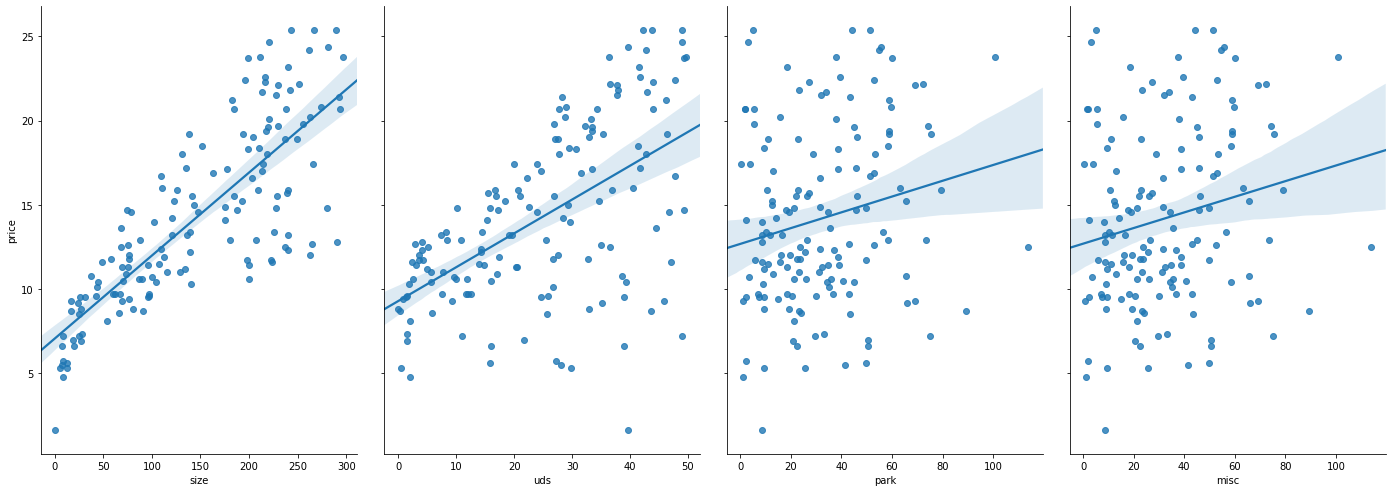

In [12]:
sns.pairplot(hdf,x_vars=['size','uds','park','misc'],y_vars=['price'],kind='reg',size=7,aspect=0.7)

In [12]:
hdf.isnull().sum()

size     0
uds      0
park     0
misc     0
price    0
dtype: int64

In [13]:
hcorr =hdf.corr()
hcorr
# r  -1 < r < 1

,size,uds,park,misc,price
size,1.000000,0.077799,0.018456,0.012139,0.801916
uds,0.077799,1.000000,0.381950,0.389683,0.563163
park,0.018456,0.381950,1.000000,0.997621,0.199687
misc,0.012139,0.389683,0.997621,1.000000,0.197855
price,0.801916,0.563163,0.199687,0.197855,1.000000


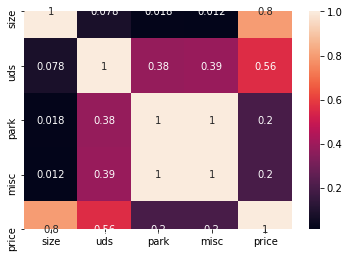

In [14]:
hcorr =hdf.corr()
sns.heatmap(hdf.corr(), annot = True )
plt.show()

# park and & misc are highly correlated . Lets drop one of each

In [15]:
featur = hcorr.drop(['park']) # 
featur

,size,uds,park,misc,price
size,1.000000,0.077799,0.018456,0.012139,0.801916
uds,0.077799,1.000000,0.381950,0.389683,0.563163
misc,0.012139,0.389683,0.997621,1.000000,0.197855
price,0.801916,0.563163,0.199687,0.197855,1.000000


In [15]:
features = ['size','uds','park','misc']
x = hdf[features]
y = hdf['price']
print (x)
print (y)

      size   uds  park  misc
0    230.1  37.8  69.2  69.3
1     44.5  39.3  45.1  58.4
2     17.2  45.9  69.3  69.2
3    151.5  41.3  58.5  58.5
4    180.8  10.8  58.4  45.1
..     ...   ...   ...   ...
143  104.6   5.7  34.4  34.4
144   96.2  14.8  38.9  38.9
145  140.3   1.9   9.0   9.0
146  240.1   7.3   8.7   8.7
147  243.2  49.0  44.3  44.3

[148 rows x 4 columns]
0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
143    10.4
144    11.4
145    10.3
146    13.2
147    25.4
Name: price, Length: 148, dtype: float64


In [21]:
# default split ratio is 75:25
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=10)  # set.seed(10) to produce same result set
#print(x_train)

In [18]:
#print(x_train)
print (x_train.shape)
print (x_test.shape)

(111, 4)
(37, 4)



# Fit the multiple linear regression model

In [22]:
initfit = LinearRegression()
model = initfit.fit(x_train,y_train)  # Fit linear model

In [23]:
# slope
print(model.coef_)

[ 0.04873206  0.18288    -0.03111357  0.02894463]


In [24]:
# Intercept
print (model.intercept_)

2.6144407482162837


In [27]:
# y = b0+b1 * x1 + b2 * x2 + b3 * x3 + b4 * x4
2.61 +  0.04873 * x_train.size + 0.18288 * x_train.uds +  -0.03111357 * x_train.park + 0.02894463 * x_train.misc

112    27.057267
120    29.047099
26     29.577175
53     32.567859
41     30.270374
         ...    
113    27.990240
64     32.010702
15     32.854759
125    26.347928
9      24.675626
Length: 111, dtype: float64

In [28]:
pred = model.predict(x_test)

In [29]:
print (pred)

[ 9.62543338 19.54453752  7.91504457 17.51222301 15.25196771 18.25707487
  6.84384568 14.90924343  9.2723547   9.92471731  9.52155878 15.06515006
 14.17603626 17.69225652 20.55052061 12.25734582 14.1220786  14.00865941
 20.80926561 17.82918417 11.95760283 19.34927343  8.01931866 21.21138331
 11.69362218  4.20228341 15.63116291  6.50279784 20.70026475  9.92593842
  5.54095075  4.21092274  3.27045793 21.87623817 19.18877372  5.78000478
 13.01425228]


## Model Evaluation

In [24]:
import numpy as np
print (np.sqrt(metrics.mean_squared_error(y_test,pred)))

1.813969698406231


In [25]:
print (metrics.mean_absolute_error(y_test,pred))

1.507115141043159


In [30]:
r_squared = initfit.score(x_test,y_test) # This is the R² score of our model
r_squared  # R² score is closer to 1 is the better model--

0.8814378759358246

In [28]:
adjusted_r_squared = 1 - (1-r_squared)*(len(y_train)-1)/(len(y_train)-x_train.shape[1]-1)
print (r_squared, adjusted_r_squared)

0.8814378759358246 0.8769638335183085


In [29]:
from sklearn.metrics import r2_score
trainPred = initfit.predict(x_train)
print ("Train Score", r2_score(y_train, trainPred))
print ("Test Score", r2_score(y_test, pred))

# overfitting - if the model performs well on training data set and if it doesnt perform well on test data set 
# it is called as overfitting
#   

Train Score 0.8972866060731048
Test Score 0.8814378759358246


## KFold Cross Validation 

* In K-Folds Cross Validation we split our data into k different subsets (or folds). We use k-1 subsets to train our data and leave the last subset (or the last fold) as test data. We then average the model against each of the folds and then finalize our model. After that we test it against the test set.

In [30]:
# from sklearn.cross_validation import KFold
#from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import cross_validate
#kf = KFold(len(hdf),5, shuffle=True,random_state=8)
#print (kf)
#scores = cross_val_score(model, x_train, y_train, scoring="mean_squared_error", cv=10)
scores = cross_validate(model, x_train, y_train,scoring=('r2'), cv=10)
#print (scores)
scores = scores['test_score']
print (scores.std())
print (scores.mean())
#rmse_scores = np.sqrt(-scores)
#rmse_scores
#rmse_scores.mean()
#rmse_scores.std()


44.39533285086812
-13.915653091226838


## Regularization Ridge , Lasso 

In [31]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
lasso = Lasso()
lasso.fit(x_train,y_train)
train_score=lasso.score(x_train,y_train)
test_score=lasso.score(x_test,y_test)
coeff_used = np.sum(lasso.coef_!=0)
print ("training score:", train_score )
print ("test score: ", test_score)
print ("number of features used: ", coeff_used)
lasso001 = Lasso(alpha=0.01, max_iter=10e5)
lasso001.fit(x_train,y_train)
train_score001=lasso001.score(x_train,y_train)
test_score001=lasso001.score(x_test,y_test)
coeff_used001 = np.sum(lasso001.coef_!=0)
print ("training score for alpha=0.01:", train_score001 )
print ("test score for alpha =0.01: ", test_score001)
print ("number of features used: for alpha =0.01:", coeff_used001)
lasso00001 = Lasso(alpha=0.0001, max_iter=10e5)
lasso00001.fit(x_train,y_train)
train_score00001=lasso00001.score(x_train,y_train)
test_score00001=lasso00001.score(x_test,y_test)
coeff_used00001 = np.sum(lasso00001.coef_!=0)
print ("training score for alpha=0.0001:", train_score00001 )
print ("test score for alpha =0.0001: ", test_score00001)
print ("number of features used: for alpha =0.0001:", coeff_used00001)

training score: 0.8969508201409235
test score:  0.8839344248737809
number of features used:  2
training score for alpha=0.01: 0.8972768358421487
test score for alpha =0.01:  0.8819949343638817
number of features used: for alpha =0.01: 4
training score for alpha=0.0001: 0.8972866050952086
test score for alpha =0.0001:  0.8814437491063359
number of features used: for alpha =0.0001: 4


In [32]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
seed=9
# create and fit the best regression model
best_model = GradientBoostingRegressor(random_state=seed)
best_model.fit(x_train, y_train)

# make predictions using the model
predictions = best_model.predict(x_test)
print("[INFO] MSE : {}".format(round(mean_squared_error(y_test, predictions), 3)))


[INFO] MSE : 0.764


# Feature Selection using RFE

In [49]:
# from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

In [34]:
# Define dictionary to store our rankings
ranks = {}
# Create our function which stores the feature rankings to the ranks dictionary
def ranking(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x,2), ranks)
    return dict(zip(names, ranks))

In [35]:
from sklearn.feature_selection import RFE, f_regression
#  Use RFE with the  Regression to select the top 2 features
fselect = RFE(model, n_features_to_select=2, verbose=3)
# features = fselect.fit(x_train,y_train)
features = fselect.fit(x,y)
print("Num Features: %s" % (features.n_features_))

#ref.support_ returns an array with boolean values to indicate whether an attribute was selected using RFE 
print("Selected Features: %s" % (features.support_))
# ref.ranking_ returns an array with positive integer values to indicate the attribute ranking with
# a lower score indicating a higher ranking 
print("Feature Ranking: %s" % (features.ranking_))
#print (features.get_params)

#ranks["RFE"] = ranking(list(map(float, rfe.ranking_)), colnames, order=-1)

Fitting estimator with 4 features.
Fitting estimator with 3 features.
Num Features: 2
Selected Features: [ True  True False False]
Feature Ranking: [1 1 3 2]


In [36]:
names = [i for i in list(x_test)]
print (names)
names,model.coef_.tolist()
#pd.DataFrame( zip(names,model.coef_.tolist()))

['size', 'uds', 'park', 'misc']


(['size', 'uds', 'park', 'misc'],
 [0.04873206141941163,
  0.18287999685340228,
  -0.031113568051940557,
  0.02894462980553017])

In [37]:
residual = y_test - pred
residual

79     1.374567
124    0.155462
24     1.784955
35    -4.712223
85    -0.051968
59     0.142925
10     1.756154
114   -0.309243
140    1.627645
144    1.475283
38     0.578441
21    -2.565150
43    -1.276036
105    1.507743
39     0.949479
1     -1.857346
19     0.477921
83    -0.408659
84     0.890734
70     0.470816
116    0.242397
142    0.750727
56    -2.519319
55     2.488617
2     -2.393622
76     2.697717
146   -2.431163
127    2.297202
52     1.899735
82     1.374062
60     2.559049
91     3.089077
108    2.029542
58     1.923762
68    -0.288774
106    1.419995
63     0.985748
Name: price, dtype: float64

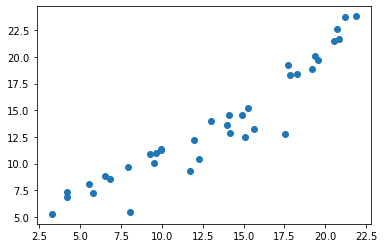

In [38]:
plt.scatter(model.predict(x_test),y_test)
plt.show()

## Goodness of fit of the model

* Is at least one coefficient non-zero?
   Null hypothesis: B1 = B2 = etc. = 0
   
   Compute F-statistic: will be close to 1 when null hypothesis is true, and much larger than 1 when null hypothesis is
   false
   
*   Even if the p-value for an individual coefficient is small, you still need to check F-statistic for the entire model
   (especially when the number of predictors is large)
   When n (number of observations) is large, F-statistic does not have to be particularly large to reject the null
   hypothesisWhen n is small, larger F-statistic is required to reject the null hypothesis
   Examine p-value for F-statistic to help you decide whether to reject the null hypothesis

* Dealing with multicollinearity

Multicollinearity is problem that you can run into when you’re fitting a regression model.
Simply put, multicollinearity is when two or more independent variables in a regression are highly
related to one another, such that they do not provide unique or independent information to the regression.
We can check multicollinearity using this command: corr(method = “name of method”).  


In [31]:
import statsmodels.formula.api as smf
import scipy.stats as scipystats
import statsmodels.api as sm
import statsmodels.stats.stattools as stools
import statsmodels.stats as stats 
from statsmodels.graphics.regressionplots import *
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
import copy
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
import math
import time

In [32]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [33]:
lm = smf.ols(formula = "price ~ size + uds + park", data = hdf).fit()
y, X = dmatrices("price ~ size + uds + park+misc", data = hdf, return_type = "dataframe")


In [43]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     411.0
Date:                Sun, 06 Sep 2020   Prob (F-statistic):           2.28e-70
Time:                        13:10:22   Log-Likelihood:                -288.60
No. Observations:                 148   AIC:                             585.2
Df Residuals:                     144   BIC:                             597.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.0423      0.376      8.098      0.0

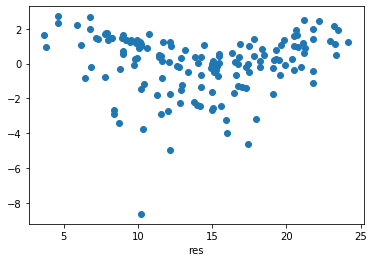

In [44]:
plt.scatter(lm.predict(), lm.resid)
plt.xlabel("res")
plt.show()

In [45]:
from scipy import stats
import statsmodels.stats.api as sms
stats.kstest(lm.resid, 'norm')  # kolmogrov smirnov test

KstestResult(statistic=0.18989508952271206, pvalue=3.794200414188087e-05)

## 1. Diagnose the Autocorrelation & Homoscadasticity

In [46]:
print ("Durbin-Watson test statistics is " + str(stools.durbin_watson(lm.resid)))

name = ['Lagrange multiplier statistic', 'p-value', 
        'f-value', 'f p-value']
test = sms.het_breuschpagan(lm.resid, lm.model.exog)
test
# Lagrange mul stat
# p value
# fvalue
# f p value 

Durbin-Watson test statistics is 2.074370837339686


(4.363514272434806, 0.2247923995977073, 1.458185808542626, 0.22850715478579436)

## 2. Diganosing Multicollinearity

In [47]:
print (hdf.corr())
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print (vif)

           size       uds      park      misc     price
size   1.000000  0.077799  0.018456  0.012139  0.801916
uds    0.077799  1.000000  0.381950  0.389683  0.563163
park   0.018456  0.381950  1.000000  0.997621  0.199687
misc   0.012139  0.389683  0.997621  1.000000  0.197855
price  0.801916  0.563163  0.199687  0.197855  1.000000
[7.029053319468767, 1.0169524239799659, 1.2025133339409273, 215.07823117828843, 216.64397689091166]


In [48]:
reg = linear_model.Ridge (alpha=0.01)
reg.fit(x_train, y_train)
np.savetxt("Ridge_coef (alpha=0.01).csv",reg.coef_,delimiter=",")

In [49]:
reg

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

## 3. Residuals

Text(0.5, 0, 'Normalized residuals')

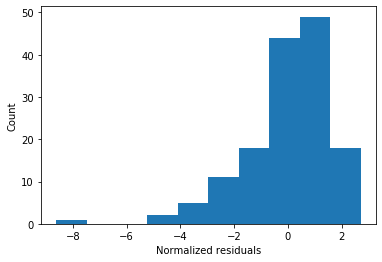

In [50]:
#lm.resid
plt.hist(lm.resid)
plt.ylabel('Count')
plt.xlabel('Normalized residuals')

## Cooks Distance

Cook’s Distance is a measure of how influential an instance is to the computation of a regression

<StemContainer object of 3 artists>

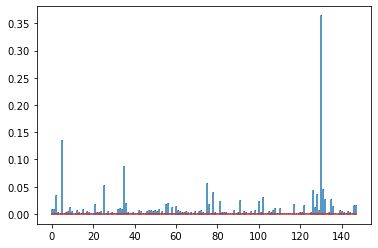

In [51]:
influence = lm.get_influence()
#c is the distance and p is p-value
(c, p) = influence.cooks_distance
plt.stem(np.arange(len(c)), c, markerfmt=",")

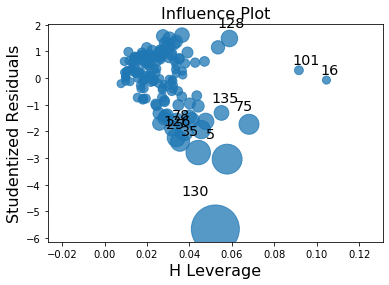

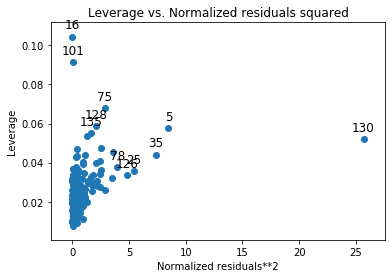

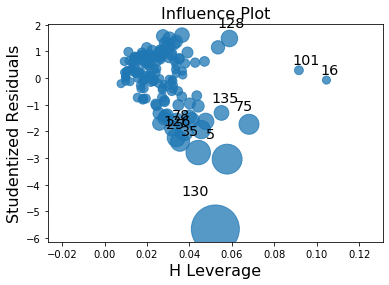

In [52]:
# Statsmodels includes a some builtin function for plotting residuals against leverage:
from statsmodels.graphics.regressionplots import *
plot_leverage_resid2(lm)
influence_plot(lm)